In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mediapipe as mp
import cv2 # openCV to connect to our webcam
import uuid
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score




In [2]:
df = pd.read_csv('D:\\Study\\MLOps Project\\MLOPs-Final-Project\\data\\normalized_hagrid.csv')
print(df.head())

    x1   y1            z1        x2        y2        z2        x3        y3  \
0  0.0  0.0 -3.649205e-07 -0.151598 -0.294276  0.004224 -0.455651 -0.449909   
1  0.0  0.0 -2.345265e-07 -0.036363 -0.445936 -0.011102  0.171484 -0.879903   
2  0.0  0.0 -2.417307e-07  0.164398 -0.399695 -0.000184  0.416193 -0.780232   
3  0.0  0.0 -1.233261e-07 -0.018948 -0.442241 -0.002824  0.066468 -0.861444   
4  0.0  0.0 -1.622995e-07 -0.008708 -0.437331 -0.002884  0.101161 -0.974837   

         z3        x4  ...       x19       y19       z19       x20       y20  \
0  0.005798 -0.758660  ... -1.135010 -0.052362 -0.020450 -1.374617  0.023374   
1 -0.021096  0.313234  ...  1.251398 -0.108693 -0.038175  1.514471 -0.082319   
2 -0.009687  0.590206  ...  1.334718  0.178565 -0.044068  1.593453  0.235623   
3 -0.008911  0.108450  ...  1.210035 -0.089563 -0.027622  1.444594 -0.075356   
4 -0.008115  0.119239  ...  1.202820 -0.300367 -0.025113  1.461002 -0.350481   

        z20       x21       y21       z21  l

In [3]:
df_copy = df.copy()

In [4]:
allowed = ['one', 'two_up', 'three', 'four']

last_col = df_copy.columns[-1]

df_copy = df_copy[df_copy[last_col].isin(allowed)]

In [5]:
unique_entries = df_copy[last_col].unique()
print(unique_entries)

['four' 'one' 'three' 'two_up']


In [ ]:
df_copy.to_csv("D:\\Study\\MLOps Project\\MLOPs-Final-Project\\data\\FourSigns.csv", index=False)

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_copy['label'] = label_encoder.fit_transform(df_copy['label'])
df_copy['label'].unique()

array([0, 1, 2, 3])

In [10]:
X = df_copy.drop(['label'], axis=1)
y = df_copy['label']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42 \
                                                    , test_size = 0.20, shuffle = True, stratify = y)

In [ ]:
classifier = RandomForestClassifier(n_estimators= 100, random_state = 42)
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

train Accuracy: 100.00%
Test Accuracy: 98.60%


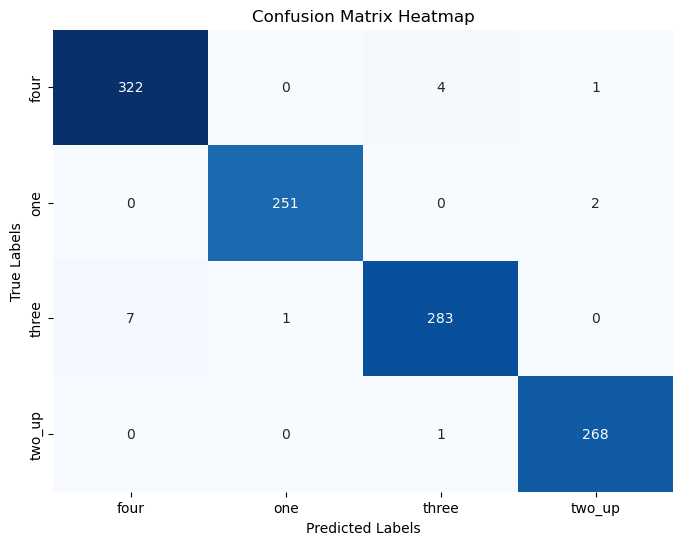

In [14]:
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'train Accuracy: {train_accuracy * 100:.2f}%')

test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_test)
class_names = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.985972492829465
Recall: 0.9859649122807017
F1-Score: 0.9859553079270419


In [ ]:
xgb_classifier = XGBClassifier(

    objective = "multi:softmax",
    num_class = len(label_encoder.classes_),
    eval_metric = 'mlogloss',
    random_state = 42
    
)

xgb_classifier.fit(X_train, y_train)

y_pred_train = xgb_classifier.predict(X_train)
y_pred_test = xgb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 98.68%


train Accuracy: 100.00%
Test Accuracy: 98.68%


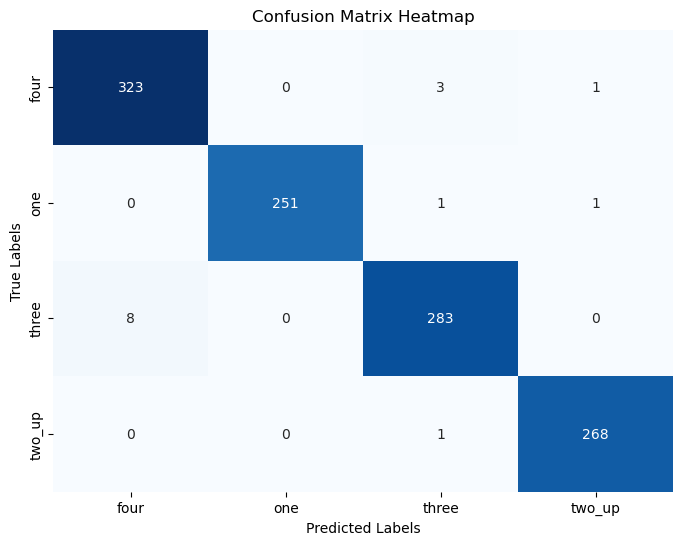

In [18]:
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'train Accuracy: {train_accuracy * 100:.2f}%')

test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_test)
class_names = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

In [19]:
# Define SVM model
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0,
                     gamma='scale', random_state=42)

# Train Model
svm_classifier.fit(X_train, y_train)

# Predict on Train & Test Set
y_pred_train = svm_classifier.predict(X_train)
y_pred_test = svm_classifier.predict(X_test)

# Evaluate Performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 98.75%
Test Accuracy: 98.77%


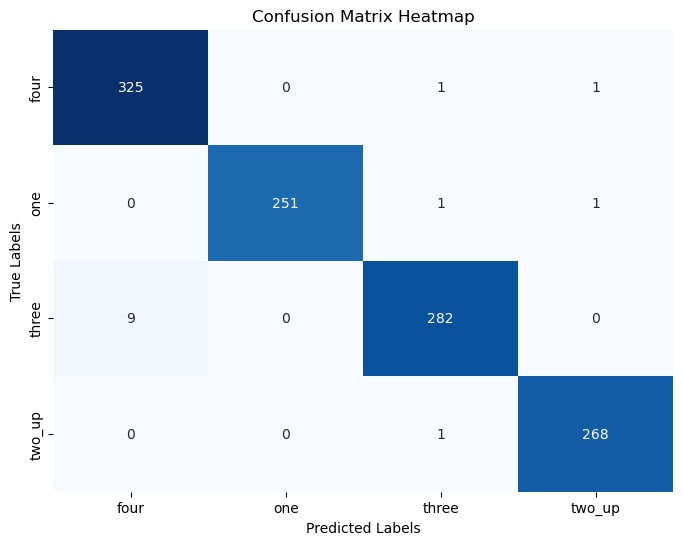

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_names = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues', cbar = False,
           xticklabels = class_names, yticklabels = class_names)


plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [21]:
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.9878358528659311
Recall: 0.987719298245614
F1-Score: 0.9877145261057836
